In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
from astropy import constants as const
import os
import pandas as pd

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27
cc = const.c.to('km/s').value


def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2) 
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 ) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 ) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

ratio = 6560.47 / 1025.27

In [2]:
#NGC 6881
name = 6881
globals()[f'lam_c_6560_{name}'] = 6559.57
globals()[f'F_total_6560_{name}'] = 6.5e-14
globals()[f'V_g_6560_{name}'] = 32
globals()[f'dlam_6560_{name}'] = (globals()[f'V_g_6560_{name}']/ cc)*(globals()[f'lam_c_6560_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6560_{name}'] = globals()[f'F_total_6560_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6560_{name}'] 

globals()[f'lam_c_6545_{name}'] =6547.93
globals()[f'F_total_6545_{name}'] = 1.2e-14
globals()[f'V_g_6545_{name}'] = 40
globals()[f'dlam_6545_{name}'] = (globals()[f'V_g_6545_{name}'] / cc)*(globals()[f'lam_c_6545_{name}']*6.4)/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6545_{name}'] = globals()[f'F_total_6545_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6545_{name}'] 

globals()[f'lam_c_6527_{name}'] =6526.58
globals()[f'F_total_6527_{name}'] = 2.9e-15
globals()[f'V_g_6527_{name}'] = 32
globals()[f'dlam_6527_{name}'] = (globals()[f'V_g_6527_{name}'] / cc)*(globals()[f'lam_c_6527_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6527_{name}'] = globals()[f'F_total_6527_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6527_{name}'] 


#NGC 6886

name = 6886
globals()[f'lam_c_6560_{name}'] = 6559.83
globals()[f'F_total_6560_{name}'] = 3.4e-13
globals()[f'V_g_6560_{name}'] = 37
globals()[f'dlam_6560_{name}'] = (globals()[f'V_g_6560_{name}']/ cc)*(globals()[f'lam_c_6560_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6560_{name}'] = globals()[f'F_total_6560_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6560_{name}'] 


globals()[f'lam_c_6545_{name}'] =6547.95
globals()[f'F_total_6545_{name}'] = 6.5e-14
globals()[f'V_g_6545_{name}'] = 47
globals()[f'dlam_6545_{name}'] = (globals()[f'V_g_6545_{name}'] / cc)*(globals()[f'lam_c_6545_{name}']*6.4)/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6545_{name}'] = globals()[f'F_total_6545_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6545_{name}'] 


globals()[f'lam_c_6527_{name}'] =6526.81
globals()[f'F_total_6527_{name}'] = 1.7e-14
globals()[f'V_g_6527_{name}'] = 37
globals()[f'dlam_6527_{name}'] = (globals()[f'V_g_6527_{name}'] / cc)*(globals()[f'lam_c_6527_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6527_{name}'] = globals()[f'F_total_6527_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6527_{name}'] 

#NGC 6741

name = 6741
globals()[f'lam_c_6560_{name}'] = 6560.47
globals()[f'F_total_6560_{name}'] = 4.8e-13
globals()[f'V_g_6560_{name}'] = 38
globals()[f'dlam_6560_{name}'] = (globals()[f'V_g_6560_{name}']/ cc)*(globals()[f'lam_c_6560_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6560_{name}'] = globals()[f'F_total_6560_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6560_{name}'] 


globals()[f'lam_c_6545_{name}'] =6548.96
globals()[f'F_total_6545_{name}'] = 6.1e-14
globals()[f'V_g_6545_{name}'] = 43
globals()[f'dlam_6545_{name}'] = (globals()[f'V_g_6545_{name}'] / cc)*(globals()[f'lam_c_6545_{name}']*6.4)/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6545_{name}'] =globals()[f'F_total_6545_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6545_{name}'] 

globals()[f'lam_c_6527_{name}'] =6527.38
globals()[f'F_total_6527_{name}'] = 2.4e-14 
globals()[f'V_g_6527_{name}'] = 38
globals()[f'dlam_6527_{name}'] = (globals()[f'V_g_6527_{name}'] / cc)*(globals()[f'lam_c_6527_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6527_{name}'] = globals()[f'F_total_6527_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6527_{name}'] 

#NGC 6884

name = 6884
globals()[f'lam_c_6560_{name}'] = 6559.12
globals()[f'F_total_6560_{name}'] = 4.1e-13
globals()[f'V_g_6560_{name}'] = 37
globals()[f'dlam_6560_{name}'] = (globals()[f'V_g_6560_{name}']/ cc)*(globals()[f'lam_c_6560_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6560_{name}'] = globals()[f'F_total_6560_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6560_{name}'] 


globals()[f'lam_c_6545_{name}'] =6547.57
globals()[f'F_total_6545_{name}'] = 3.5e-14
globals()[f'V_g_6545_{name}'] = 37
globals()[f'dlam_6545_{name}'] = (globals()[f'V_g_6545_{name}'] / cc)*(globals()[f'lam_c_6545_{name}']*6.4)/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6545_{name}'] = globals()[f'F_total_6545_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6545_{name}'] 

globals()[f'lam_c_6527_{name}'] =6526.13
globals()[f'F_total_6527_{name}'] = 2.0e-14
globals()[f'V_g_6527_{name}'] = 37
globals()[f'dlam_6527_{name}'] = (globals()[f'V_g_6527_{name}'] / cc)*(globals()[f'lam_c_6527_{name}'])/(2*np.sqrt(2*np.log(2)))
globals()[f'F_p_6527_{name}'] = globals()[f'F_total_6527_{name}'] / np.sqrt(np.pi) / globals()[f'dlam_6527_{name}'] 

# J 900

name = 900
globals()[f'lam_c_6560_{name}'] = 6561.57
globals()[f'F_p_6560_{name}'] = 0.62983
globals()[f'V_g_6560_{name}'] = 40.84 
globals()[f'dlam_6560_{name}'] = (globals()[f'V_g_6560_{name}']/ cc)*(globals()[f'lam_c_6560_{name}'])/(2*np.sqrt(2*np.log(2)))

globals()[f'lam_c_6545_{name}'] =6549.61
globals()[f'F_p_6545_{name}'] = 0.01115
globals()[f'V_g_6545_{name}'] =  53.35
globals()[f'dlam_6545_{name}'] = (globals()[f'V_g_6545_{name}'] / cc)*(globals()[f'lam_c_6545_{name}']*6.4)/(2*np.sqrt(2*np.log(2)))

globals()[f'lam_c_6527_{name}'] =6528.55 
globals()[f'F_p_6527_{name}'] = 0.02964
globals()[f'V_g_6527_{name}'] =  43.47
globals()[f'dlam_6527_{name}'] = (globals()[f'V_g_6527_{name}'] / cc)*(globals()[f'lam_c_6527_{name}'])/(2*np.sqrt(2*np.log(2)))



In [3]:
name= 6881
globals()[f'F_p_6545_{name}']

2.851285748434195e-15

0.1835596993831155


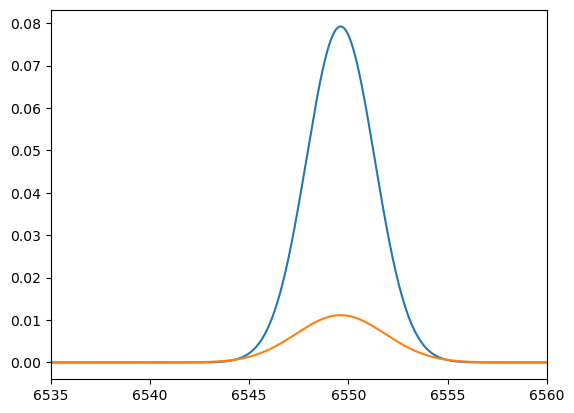

In [4]:
# def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff,):
#     ff = (lam-lam_i)/(ratio*del_lam_i) 
#     fl = F0*np.exp(-ff**2/2) 
#     return ((fl) / ratio**2) * (eff * flux_L) 


f_R_6545_RCE_1 = R_Flux(F_p_6560_900,x,lam_c_6545_900,dlam_6560_900,ratio, 5.15,1,0)
f_R_6545_obs = Data_R_Flux(F_p_6545_900,x,lam_c_6545_900,dlam_6545_900,0)

RCE_1 = total_flux(f_R_6545_RCE_1 ,x ,0)
obs = total_flux(f_R_6545_obs ,x ,0)
plt.plot(x,f_R_6545_RCE_1)
plt.plot(x,f_R_6545_obs)
plt.xlim(6535,6560)

print(obs/RCE_1)

5000
Total flux of RCE 1 case is =  5.231471716203261e-14
Total flux of Observed case is =  1.2000000000000006e-14
RCE of ratio is  0.22938095914449486


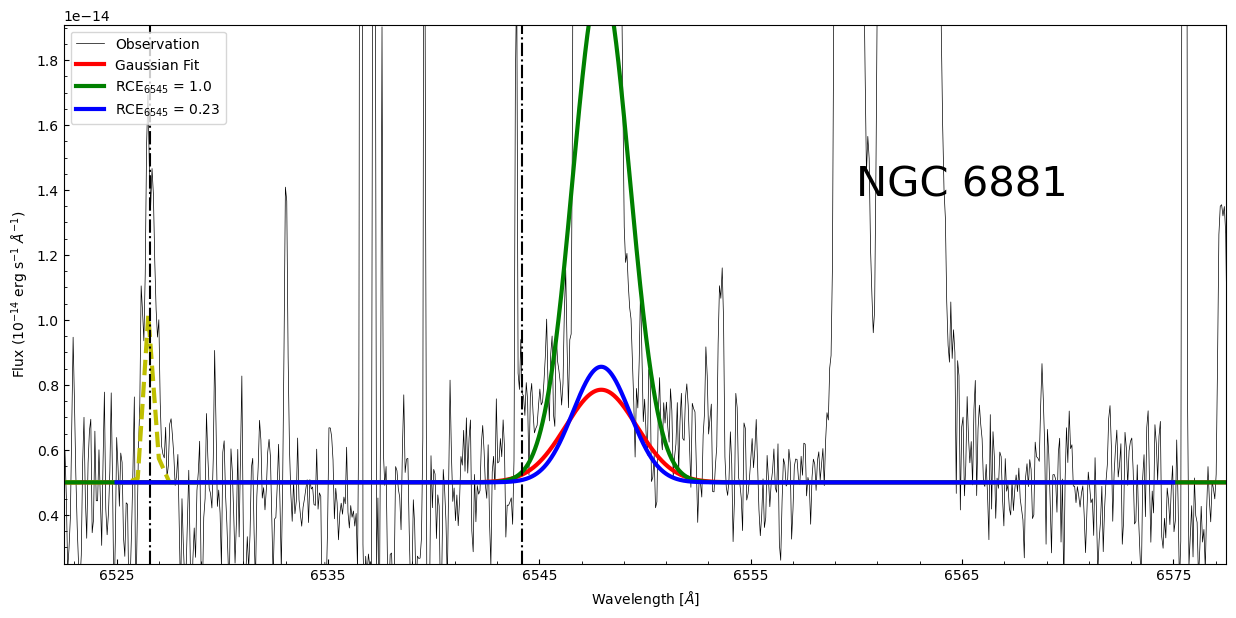

In [5]:
fig = plt.figure(1,figsize=(15,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()


Fc = 0.5e-14
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6881

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# aa= np.argmax(f_DR)
# # plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}'],Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*2.5,f'NGC {name}',size=30)
plt.legend(loc='upper left')



5000
Total flux of RCE 1 case is =  5.401136760580785e-14
Total flux of Observed case is =  2.88345105454125e-14
RCE of ratio is  0.5338600339812896


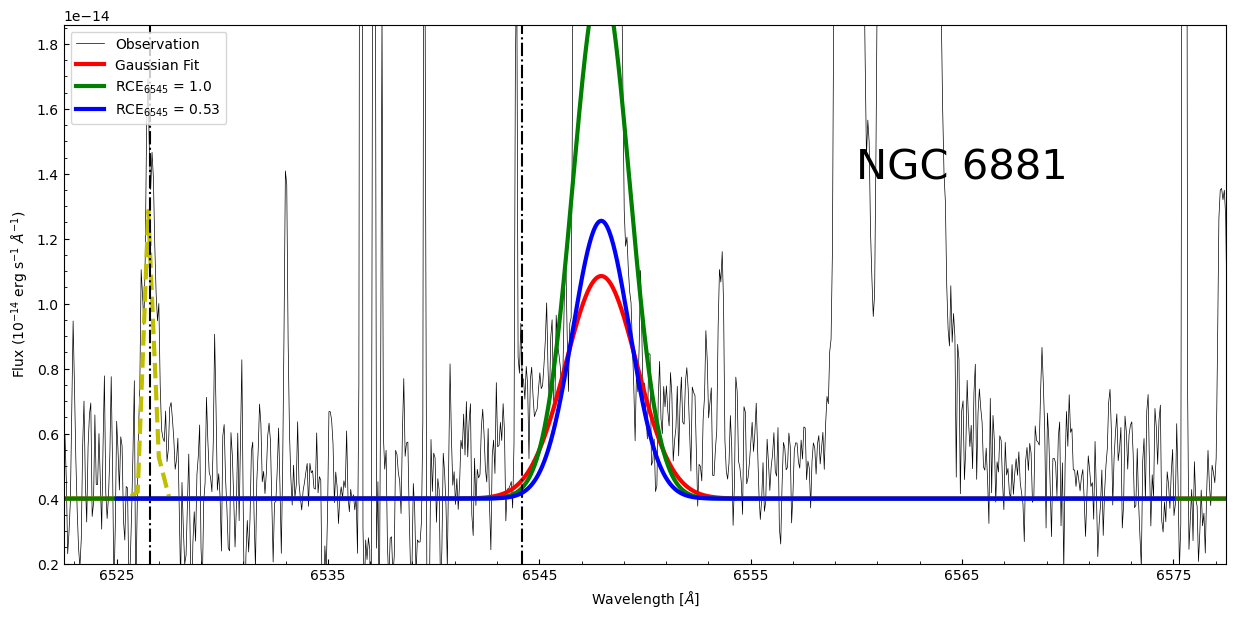

In [6]:
fig = plt.figure(1,figsize=(15,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()


Fc = 0.4e-14
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6881

peak_6560 = 8.8e-14
peak_6527 = 4.0e-15
width_6527 = 19


f = Flux(globals()[f'F_p_6560_{name}'] + Fc ,x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] + Fc ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# aa= np.argmax(f_DR)
# # plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}']+Fc ,x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'] + Fc ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}'],Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] + Fc ,x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}']+Fc ,x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}']+Fc ,x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*2.5,f'NGC {name}',size=30)
plt.legend(loc='upper left')



5000
Total flux of RCE 1 case is =  2.7364621284755564e-13
Total flux of Observed case is =  6.499999999999992e-14
RCE of ratio is  0.2375329785258548


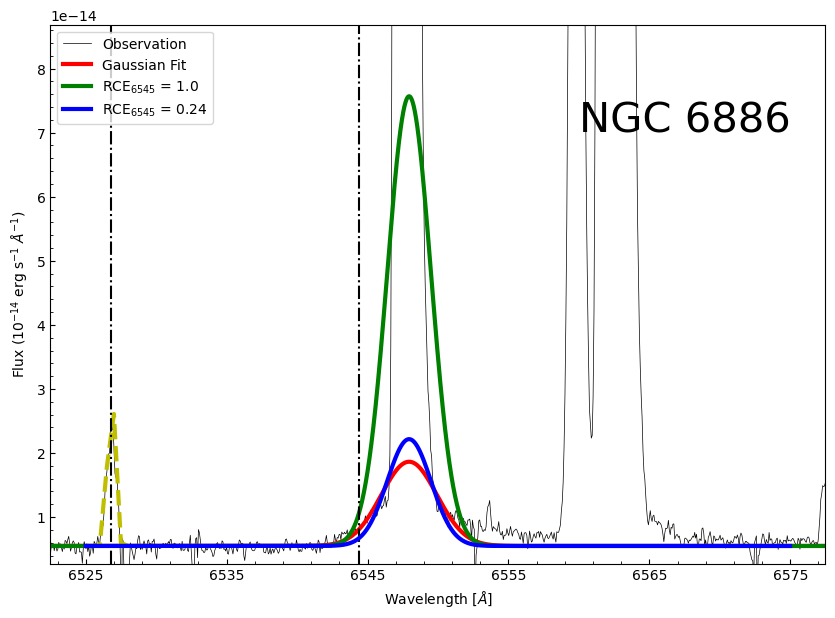

In [7]:
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.55e-14
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6886

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# aa= np.argmax(f_DR)
# # plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}'],Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*2.5,f'NGC {name}',size=30)
plt.legend(loc='upper left')



5000
Total flux of RCE 1 case is =  3.863240651965478e-13
Total flux of Observed case is =  6.099999999999992e-14
RCE of ratio is  0.15789852482776426


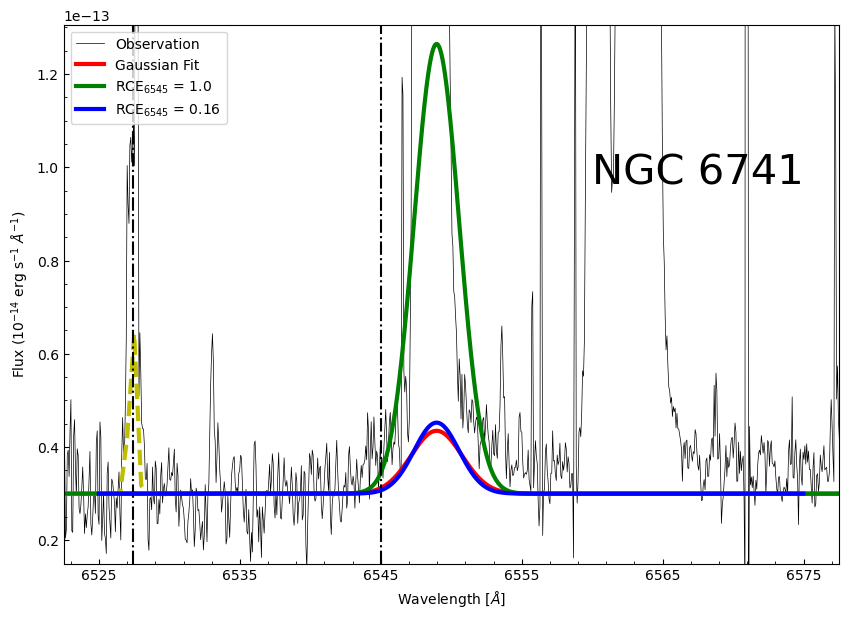

In [8]:
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.3e-13
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6741

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# aa= np.argmax(f_DR)
# # plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}'],Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*2.5,f'NGC {name}',size=30)
plt.legend(loc='upper left')



5000
Total flux of RCE 1 case is =  3.2998513902205167e-13
Total flux of Observed case is =  3.499999999999992e-14
RCE of ratio is  0.10606538253124484


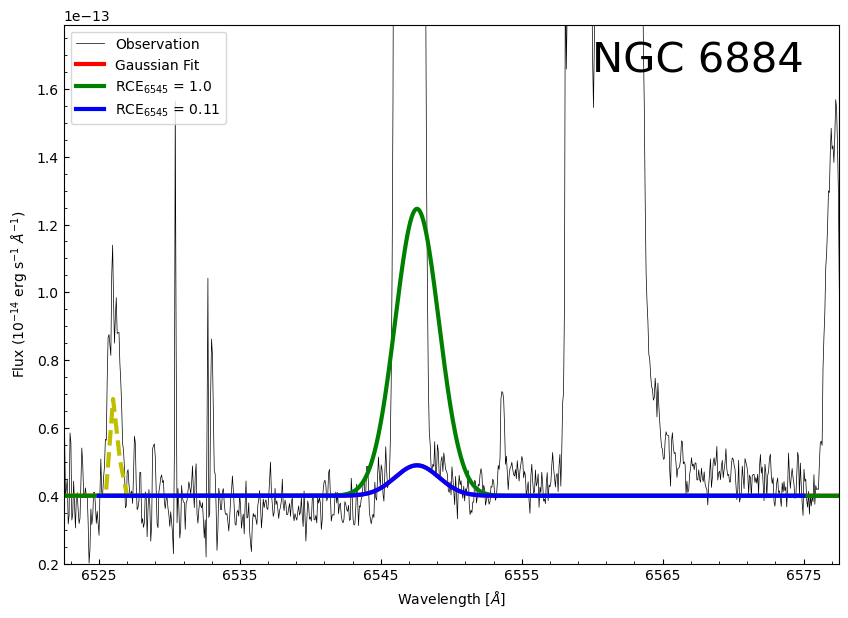

In [9]:
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.4e-13
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6884

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# # aa= np.argmax(f_DR)
# # # plt.text(x[aa],f_DR[aa],'Raman 6545')



# x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*2)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}']*10,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']*10+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*5,f'NGC {name}',size=30)
plt.legend(loc='upper left')



5000
Total flux of RCE 1 case is =  5.231471716203261e-14
Total flux of Observed case is =  1.2000000000000006e-14
RCE of ratio is  0.22938095914449486
5000
Total flux of RCE 1 case is =  2.7364621284755564e-13
Total flux of Observed case is =  6.499999999999992e-14
RCE of ratio is  0.2375329785258548
5000
Total flux of RCE 1 case is =  3.863240651965478e-13
Total flux of Observed case is =  6.099999999999993e-14
RCE of ratio is  0.15789852482776429
5000
Total flux of RCE 1 case is =  3.2998513902205167e-13
Total flux of Observed case is =  3.499999999999992e-14
RCE of ratio is  0.10606538253124484


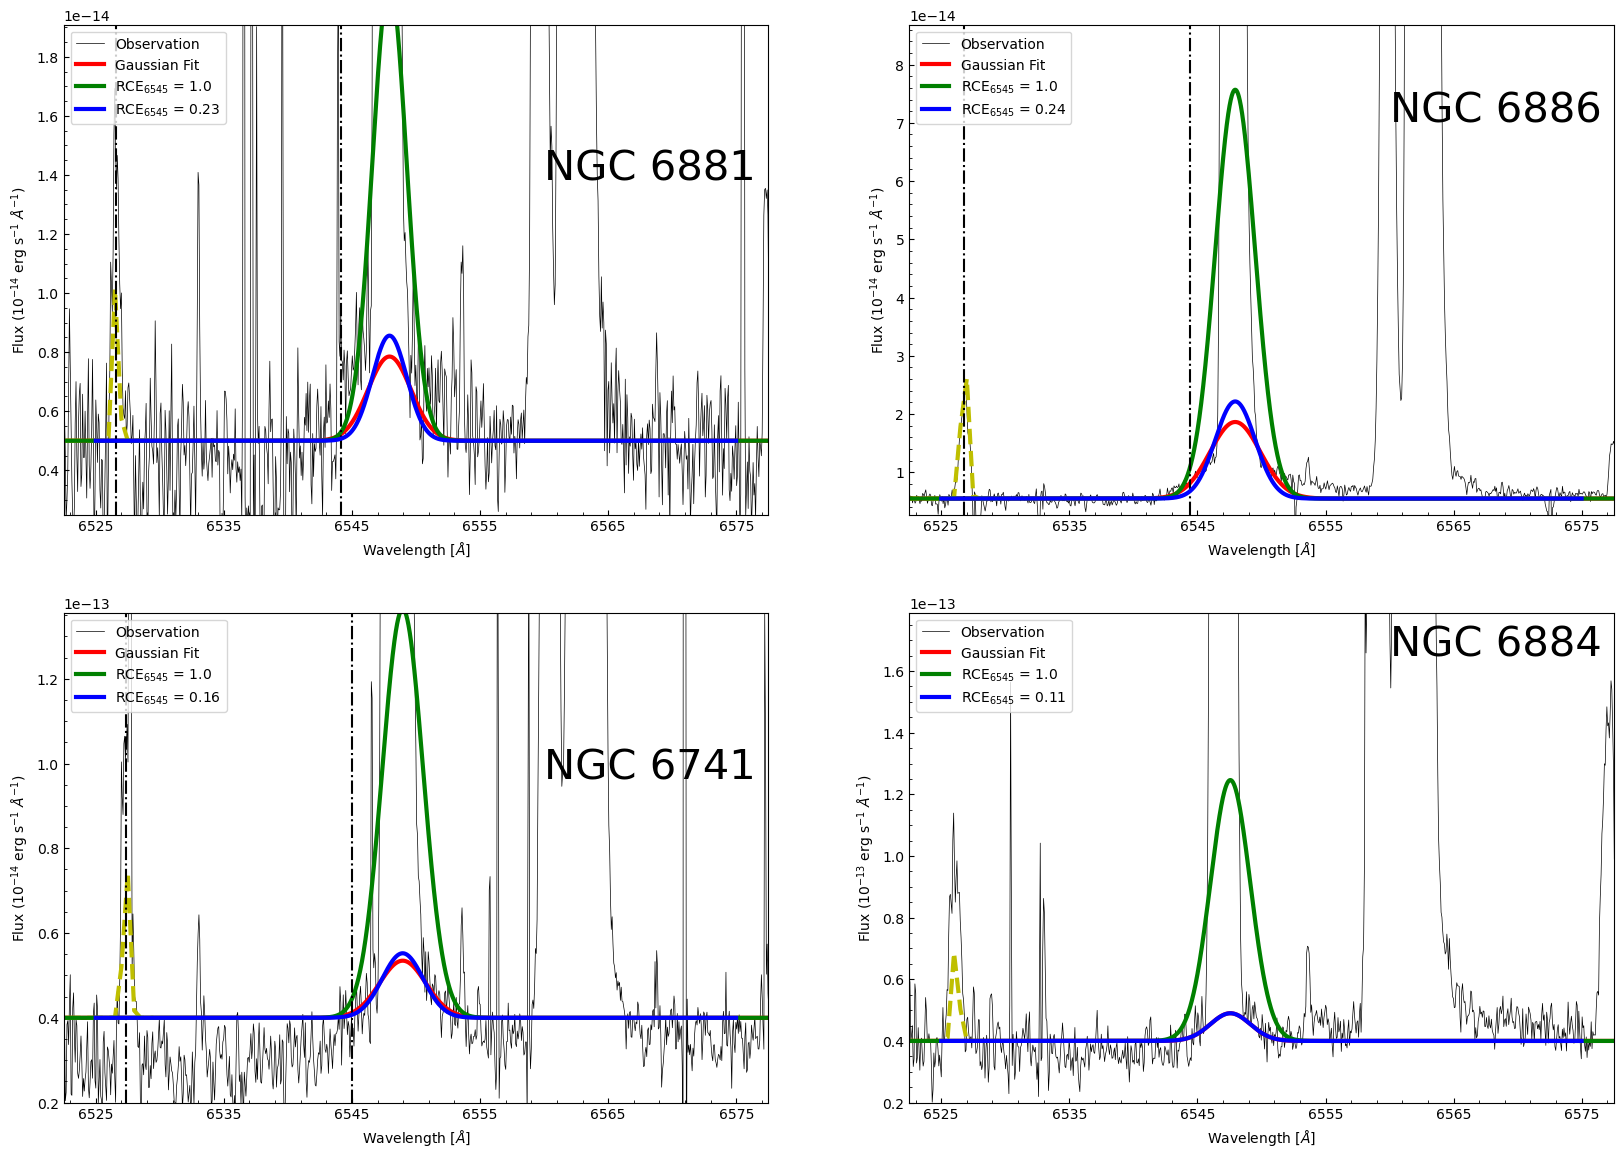

In [10]:
fig = plt.figure(1,figsize=(20,14))

plt.subplot(221)
fig = plt.figure(1,figsize=(15,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()


Fc = 0.5e-14
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6881

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# aa= np.argmax(f_DR)
# # plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}'],Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*2.5,f'NGC {name}',size=30)
plt.legend(loc='upper left')


plt.subplot(222)
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.55e-14
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6886

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# aa= np.argmax(f_DR)
# # plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}'],Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*2.5,f'NGC {name}',size=30)
plt.legend(loc='upper left')




plt.subplot(223)

fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.4e-13
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6741

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# aa= np.argmax(f_DR)
# # plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}'],Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*2.5,f'NGC {name}',size=30)
plt.legend(loc='upper left')



plt.subplot(224)

fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.4e-13
plt.plot(lam,flux ,'k',lw=0.5,label='Observation')
name= 6884

f = Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'dlam_6560_{name}'],Fc)
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'] ,x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
# # aa= np.argmax(f_DR)
# # # plt.text(x[aa],f_DR[aa],'Raman 6545')



# x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(globals()[f'F_p_6527_{name}'],x_6527,globals()[f'lam_c_6527_{name}'],globals()[f'dlam_6527_{name}'],Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*2)
plt.minorticks_on()

ii = 1.0
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7

del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(globals()[f'lam_c_6527_{name}']*10,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(globals()[f'lam_c_6527_{name}']*10+ del_lam,Fc*0.5,globals()[f'F_p_6527_{name}']*3 + Fc*0.5,colors='k',linestyles='-.')
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(globals()[f'F_p_6545_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6545_{name}'],Fc)
ef = 1.0
f_R_1 =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)


print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(globals()[f'F_p_6560_{name}'],x_flux,globals()[f'lam_c_6545_{name}'],globals()[f'dlam_6560_{name}'],ratio,5.15 ,ef,Fc)
plt.plot(x_flux,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.text(x_max-15, globals()[f'F_p_6527_{name}']*5,f'NGC {name}',size=30)
plt.legend(loc='upper left')

# plt.savefig(r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/RCE_test.pdf', bbox_inches='tight')
